<a href="https://colab.research.google.com/github/rjy1022/my_assets/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This notebook contains modified excerpts from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook). The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).  In addition, aspects have been adapted from the Neuromatch course materials [here](https://github.com/NeuromatchAcademy/course-content/blob/master/tutorials/README.md).*

For this exercise, we will explore a variety of Dimensionality Reduction methods on both simulated and real data.  As always, all questions to be answered will be in <font color="blue"> blue</font> and places to write your answers will be in <font color="green"> green</font>.  Sean and I will be moving through the breakout rooms to help.

In [ ]:
#import various useful packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
%matplotlib inline

#importing dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
import umap

#importing clustering packages
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

##Dimensionality Reduction Techniques in Python

In this section, we'll introduce the general syntax for applying dimensionality reduction in python.  You'll notice that the syntax is similar across methods (and similar to ```PCA``` from last time), but there will be different choices for parameters.

For all cases below, we'll assume that our data has the form $X\in\mathcal{R}^{N\times d}$, where $N$ is the number of data points, and $d$ is the dimensionality of the dataset.  We will attempt to reduce the dimensionality of the data to create a dataset $Y\in\mathcal{R}^{N\times m}$, where $m$ is the new dimensionality of the data.

Note: Although there is no data provided for this part, ff you would like to test the syntax, just initialize an $N\times d$ random matrix ```X``` and plug into the code below.

###Review: Principal Components Analysis (PCA)

As we've seen several tiems already, PCA performs dimensionality reduction by computing the eigenvectors and eigenvalues of $X$.

Most of the dimensionality reduction techniques in python will use a very similar syntax.

In [ ]:
X = np.random.normal(20,1,(1000,100))

#To initialize a PCA class instance
pca_example = PCA() #Note: Use pca_example = PCA(n_components=m) to only compute for the largest m eigenmodes 

#To apply PCA to a data set
pca_example.fit(X)

#To return back it's projections onto the eigenvectors
projections = pca_example.transform(X)
print(projections.shape)

#To apply PCA to a data set and simultaneously return back it's projections onto the eigenvectors
projections = pca_example.fit_transform(X)
print(projections.shape)

#The (sorted from largest to smallest) eigenvalues are in the class variable:
example_pca_eigenvalues = pca_example.explained_variance_

#The fraction of the variance explained by each modes is given by:
example_pca_relative_variance = pca_example.explained_variance_ratio_

(1000, 100)
(1000, 100)


###Non-negative Matrix Factorization (NMF)

Similar to PCA, NMF is a linear decomposition, $X \approx YH$, where $Y$ is our $N\times m$ reduced-dimension coordinates and $W$ is our set of basis vectors.  What is different, though, is that (i) we're assuming that all elements of $X$, $Y$, and $H$ are $\ge 0$ and (ii) we're no longer assuming that the basis vectors are orthogonal to each other.  Note: this method applies well to any data that has a hard upper or lower bound, even if that bound is not zero (we could add/subract the lower bound value from the data to make it zero, and we could multiply the data by $-1$ to turn an upper bound into a lower bound).

In [ ]:
#Initializing the NMF object (note that there are other optiosn for regularizing/initializing)
nmf_example = NMF(n_components=2) 

#Fits the model and returns back the low-dimensional projections
Y = nmf_example.fit_transform(X)

#To return the basis vectors
H = nmf_example.components_

#Returns back the NMF error (the Frobenius mean of X - YH)
nmf_error = nmf_example.reconstruction_err_

#To calculate the high-dimensional values of the low-d vectors
X_reconstructed = nmf_example.inverse_transform(Y)

###Multi-Dimensional Scaling (MDS)

MDS minimizes the differences between distances in the high-dimensional space and the low dimensional space: $\sum_{i,j} (D_{ij}(X) - \Delta_{ij}(Y))^2$. 

In [ ]:
#Initializing the MDS object.
mds_example = MDS(n_components=2) 

#Fits the model and returns back the low-dimensional projections
Y = mds_example.fit_transform(X)

#If you wish to input a distance matrix (D in NxN) instead of the data matrix (say, if you want a non-Euclidean distance):
#mds_example = MDS(n_components=2,dissimilarity='precomputed')
#Y = mds_example.fit_transform(D)

#To return the embedded points
Y2 = mds_example.embedding_

#Returns back the MDS error (the cost function value at the found minimum)
#This is often useful for determining the value for n_components
mds_error = mds_example.stress_

###Isomap

Isomap is effectively the same as MDS, but using a topological distance metric (as discussed in the reading and in class).

In [ ]:
#Initializing the Isomap object. n_components is the dimensionality of the embedding 
#and n_neighbors is the number of neighbors used to construct the manifold.
#The 'metric' option can also be called if you want to choose a different distance metric
iso_example = Isomap(n_components=2,n_neighbors=20) 

#Fits the model and returns back the low-dimensional projections
Y = iso_example.fit_transform(X)

#To return the embedded points
Y2 = iso_example.embedding_

#Returns back the Isomap error (the cost function value at the found minimum)
#This is often useful for determining the value for n_components
iso_error = iso_example.reconstruction_error()

#To return the geodesic distance matrix used by the algorithm
D_geodesic = iso_example.dist_matrix_

###Local Linear Embedding (LLE)

LLE is a local dimensionality reduction method that fits linear models to data in the high-dimensional space and then attempts to map the points into a lower-dimensional space in a manner such that these models are optimally preserved.

In [ ]:
#Initializing the LLE object. n_components is the dimensionality of the embedding 
#and n_neighbors is the number of neighbors used to construct the high-dimensional model.
LLE_example = LocallyLinearEmbedding(n_components=2,n_neighbors=20) 

#Fits the model and returns back the low-dimensional projections
Y = LLE_example.fit_transform(X)

#To return the embedded points
Y2 = LLE_example.embedding_

#Returns back the LLE error (the cost function value at the found minimum)
LLE_error = LLE_example.reconstruction_error_

#Returns an object containing the nearest neighbotrs
neighbors_LLE = LLE_example.nbrs_

###t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE performs dimensionality reduction by modeling a random walk on the data set.  Specifically, $p_{ij}\propto \exp\left[\frac{-D_{ij}^2}{2\sigma_i^2}\right]$ is the probability of transitioning from data point $i$ to data point $j$ in the high-dimensional space, and $q_{ij}\propto \frac{1}{1+\Delta^2_{ij}(Y)}$ is the same probability in the low-dimensional space.  t-SNE equates these probabilities through minimizing the cost function $J = D_{KL}(p||q) = \sum_{ij} p_{ij} \log\frac{p_{ij}}{q_{ij}}$ (this is called the Kullback-Leibler divergence between $p$ and $q$).  

Note how in the equation for $p_{ij}$, there is a term $\sigma_i$.  This value sets the effective neighborhood around point $i$.  Because high-dimensional spaces often can have large variations in density due to sampling limitations and changes in the local dimensionality, we typically choose $\sigma$ independently for each data point in order to keep the number of nearest neighbors roughly constant.  More precisely, we use a quantity call the **perplexity** to determine this. The perplexity equals $2^{\mathcal{H}_i}$, where $\mathcal{H}_i = -\sum_{j\ne i}p_{ij}\log{p_{ij}}$ is the entropy of the conditional probability distribution of transitions from point $i$.  It can be shown (and we will) that this quantity can be thought of as an effective number of neighbors.

In [ ]:
#Initializing the TSNE object. n_components is the dimensionality of the embedding 
#and perplexity is, well, the perplexity (i.e., an effective number of neighbors).
#For the method you can choose either 'exact' or 'barnes-hut'. Barnes-Hut is faster, 
#but less accurate
tsne_example = TSNE(n_components=2,perplexity=20,method='exact') 

#Fits the model and returns back the low-dimensional projections
Y = tsne_example.fit_transform(X)

#To return the embedded points
Y2 = tsne_example.embedding_

#Returns back the LLE error (the cost function value at the found minimum)
tsne_error = tsne_example.kl_divergence_

###Uniform Manifold Approximation and Projection (UMAP)

The last method we will discuss today is UMAP.  As discussed in class, UMAP is philosophically similar to t-SNE, but has some nice computational properties (i.e., it's faster and takes up less memory), although it is not quite as focused soley on local structure like t-SNE is.  There are a large number of potential options for this method, which are fully itemized [here](https://umap-learn.readthedocs.io/en/latest/api.html).

In [ ]:
#Initializing the UMAP object. n_components is the dimensionality of the embedding, 
#n_neighbors is the number of nearest neighbors to use, min_dist is the minimum 
#distance between points in the embedded space (think of it as a repulsion term).
#If desired, it is also possible to input in a difference distance metric via 'metric'
umap_example = umap.UMAP(n_components=2,n_neighbors=15,min_dist=.1) 

#Fits the model and returns back the low-dimensional projections
Y = umap_example.fit_transform(X)

#To embed new points into the UMAP manifold
#Z = umap_example.transform(X2)

#To return the embedded points
Y2 = umap_example.embedding_

##Applying Dimensionality Reduction Techniques to MNIST

In this section, you will apply PCA, NMF, MDS, Isomap, LLE, t-SNE, and UMAP to a subset of the MNIST data set from last time (it would take too long to analyze all 70,000 digits for some of the methods).

In [ ]:
#Import MNIST Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
allDigitData = mnist.data

In [ ]:
#Select 1000 random digits
N = 1000
idx = random.choice(range(np.shape(allDigitData)[0]),N)
digitData = allDigitData[idx,:]
digitNames = mnist.target.astype(np.int)[idx]

In [ ]:
# @title Helper Functions (Run this code)

def plot_MNIST_reconstruction(X, X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable

  Returns:
    Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Reconstructed')
  plt.tight_layout()


def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(10):
    for k2 in range(10):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((10 * 28, 0))
  plt.ylim((10 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 255])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()

def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  #fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('seismic')
  Z = np.zeros((28*4,28*6))
  k = 0
  for i in range(4):
    xstart = 0 + i*28
    xend = (i+1)*28
    for j in range(6):
      ystart = 0 + j*28
      yend = (j+1)*28
      Z[xstart:xend,ystart:yend] = np.real(np.reshape(weights[k,:], (28, 28)))
      k += 1
  #plt.imshow(np.real(np.reshape(weights[i,:], (28, 28))), cmap=cmap)
  plt.imshow(Z,cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar()
  #ax.set_xticks([])
  #ax.set_yticks([])
  plt.show()


def plot_MNIST_weights_NMF(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  #fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('Greys')
  Z = np.zeros((28*4,28*6))
  k = 0
  for i in range(4):
    xstart = 0 + i*28
    xend = (i+1)*28
    for j in range(6):
      ystart = 0 + j*28
      yend = (j+1)*28
      Z[xstart:xend,ystart:yend] = np.real(np.reshape(weights[k,:], (28, 28)))
      k += 1
  #plt.imshow(np.real(np.reshape(weights[i,:], (28, 28))), cmap=cmap)
  plt.imshow(Z,cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(0,.6*np.max(weights))
  plt.colorbar()
  #plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  #ax.set_xticks([])
  #ax.set_yticks([])
  plt.show()


def add_noise(X, frac_noisy_pixels):
  """
  Randomly corrupts a fraction of the pixels by setting them to random values.

  Args:
     X (numpy array of floats)  : Data matrix
     frac_noisy_pixels (scalar) : Fraction of noisy pixels

  Returns:
     (numpy array of floats)    : Data matrix + noise

  """

  X_noisy = np.reshape(X, (X.shape[0] * X.shape[1]))
  N_noise_ixs = int(X_noisy.shape[0] * frac_noisy_pixels)
  noise_ixs = np.random.choice(X_noisy.shape[0], size=N_noise_ixs,
                               replace=False)
  X_noisy[noise_ixs] = np.random.uniform(0, 255, noise_ixs.shape)
  X_noisy = np.reshape(X_noisy, (X.shape[0], X.shape[1]))

  return X_noisy




####<font color="blue">Question #1: Run both PCA and NMF on this data set (let the NMF```n_components=2``` for now).  Plot the 2-D projections you obtain with this method (on different subplots).  What are the similarities and differences? </font>

<font color="blue"> (Note: Note, you can use:

```plt.scatter(Y[:,0],Y[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()```

to create a scatter plots with the digits colored seperately) </font>

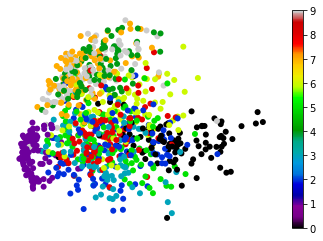

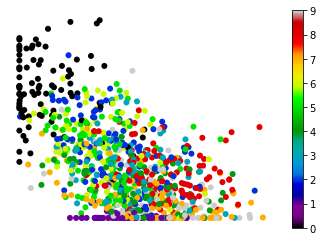

In [ ]:
pca_example = PCA()
Y = pca_example.fit_transform(digitData)
plt.scatter(Y[:,0],Y[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.axis("Off")
plt.show()

nmf_example = NMF(n_components=2)
Y2 = nmf_example.fit_transform(digitData)
plt.scatter(Y2[:,0],Y2[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.axis("Off")
plt.show()

<font color="green">Compare the 2-D projections you obtain with this method.  What are the similarities and differences? 

PCA seems to do a couple digits well (0 and 1), but otherwise is pretty indistinct. NMF is much less clustered, and points (especially 0 and 1, which it takes for its axes) seem to be pushed to the edge of the graph. Both do well with 0 and 1.</font>


####<font color="blue">Question #2: Now run both PCA and NMF with ```n_components=28```.  

Use: </font>

```plt.rcParams["figure.figsize"] = (20,10)```

```plt.subplot(2,1,1)```

```plot_MNIST_weights(```[Your PCA object]```.components_)```

```plt.subplot(2,1,2)```

```plot_MNIST_weights_NMF(```[Your NMF object]```.components_)```

<font color="blue">to plot the basis vectors for both PCA and NMF.  How do the basis vectors differ? What is your explanation for the difference?

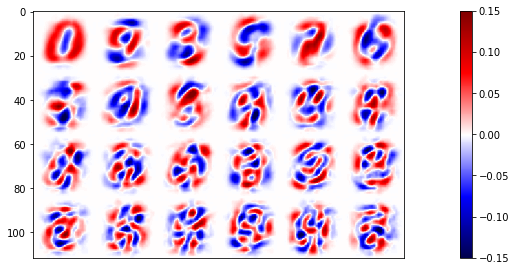

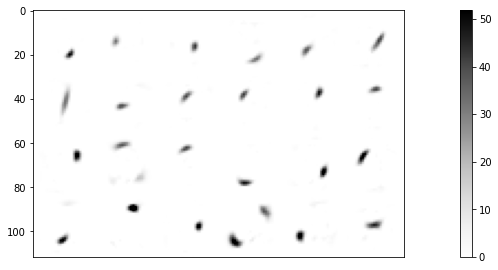

In [ ]:
pca_example = PCA()
Y = pca_example.fit_transform(digitData)


nmf_example = NMF(n_components=28)
Y2 = nmf_example.fit_transform(digitData)


plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2,1,1)

plot_MNIST_weights(pca_example.components_[:28])

plt.subplot(2,1,2)

plot_MNIST_weights_NMF(nmf_example.components_)

<font color="green"> How do the basis vectors differ? What is your explanation for the difference? 

Well, from our knowledge of PCA and NMF, we know that those from PCA are orthogonal and those from NMF are not. This makes it so that NMF is better at finding distinguishing features while PCA searches for bases to explain the data completely. Since NMF is non-negative, all of it's bases vectors represent features, instead of the absence of features.</font>

####<font color="blue">Question #3: Apply t-SNE to the MNIST data (embedding into two dimensions), using perplexities of 2, 5, and 50 (remembering to re-initialize a new TSNE object each time) and make scatter plots of each of the resulting embeddings (using the code from Question #1 to plot). Describe how the results are changing as a function of the perplexity and explain why these changes are likely occuring.</font>

0.8723530173887992 0.9898861359732898 0.9512144882293537


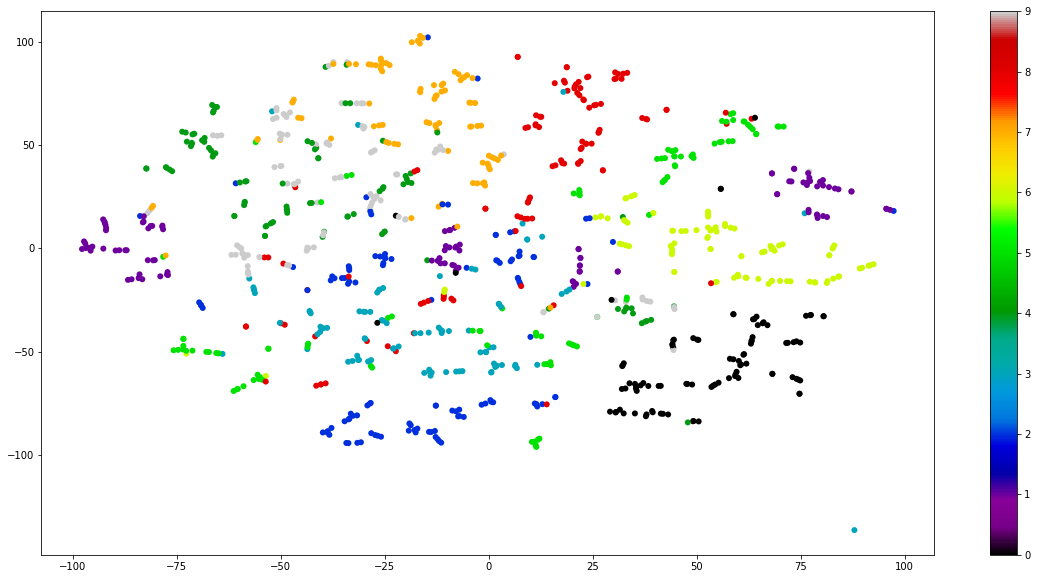

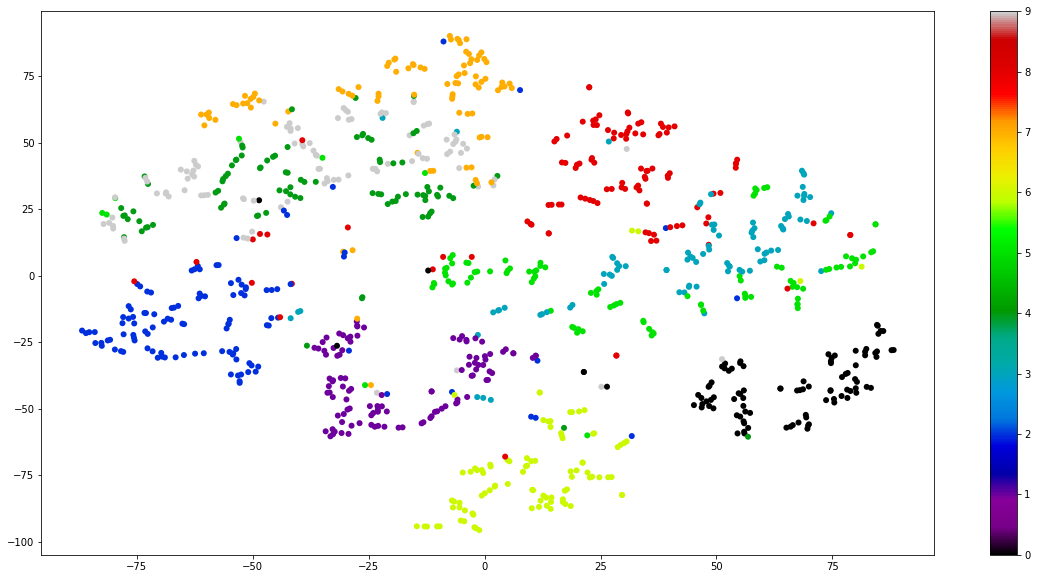

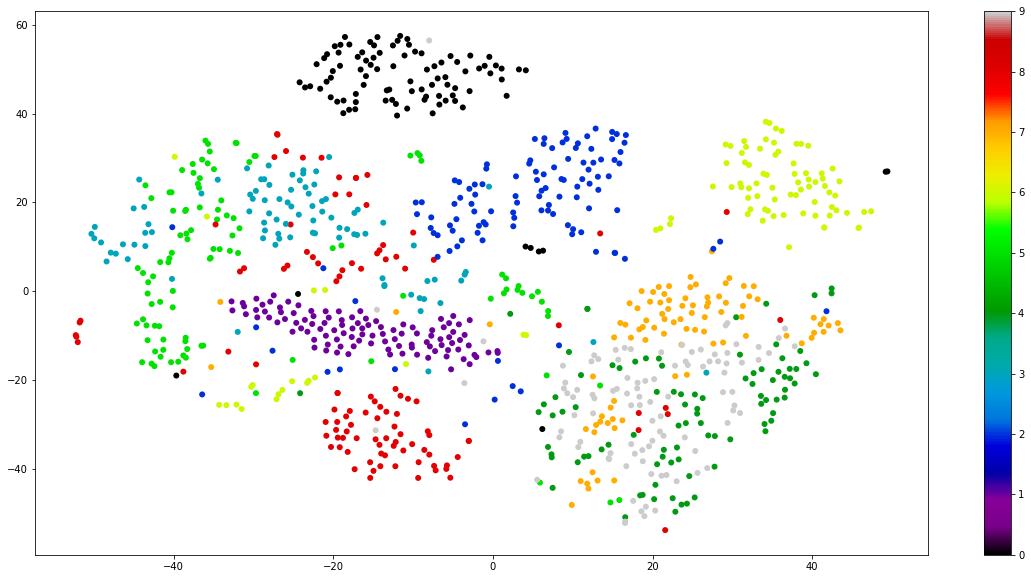

In [ ]:
tsne2 = TSNE(n_components=2,perplexity=2,method='exact')
tsne5 = TSNE(n_components=2,perplexity=5,method='exact')
tsne50 = TSNE(n_components=2,perplexity=50,method='exact')

Y2 = tsne2.fit_transform(digitData)
Y2_2 = tsne2.embedding_

Y5 = tsne5.fit_transform(digitData)
Y5_2 = tsne5.embedding_

Y50 = tsne50.fit_transform(digitData)
Y50_2 = tsne50.embedding_

tsne_error2 = tsne2.kl_divergence_
tsne_error5 = tsne5.kl_divergence_
tsne_error50 = tsne50.kl_divergence_
print(tsne_error2, tsne_error5, tsne_error50)

plt.scatter(Y2_2[:,0],Y2_2[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.show()

plt.scatter(Y5_2[:,0],Y5_2[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.show()

plt.scatter(Y50_2[:,0],Y50_2[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.show()

<font color="green">Describe how the results are changing as a function of the perplexity and explain why these changes are likely occuring.

As the perplexity increases, the size of the clusters increases.This occurs because tSNE takes perplexity as a representation of the number of nearest neighbors to consider when forming clusters. If perplexity is 2, tSNE will try to have clusters of size ~= 2, and so on.</font>

####<font color="blue">Question #4: Now, apply all 7 dimensionality reduction techniques (PCA, NMF, Isomap, LLE, MDS, t-SNE, and UMAP) to these data and plot the resulting 2-D embeddings.  You goal is to try and get the best possible clustering structure from each of these methods, where each digit is distinctly seperated from other digits, so you might need to play with the embedding parameters (e.g., ```n_neighbors```, ```perplexity```, etc.) to get good results.  Which method(s) would you choose to best seperate out the digits?  Why?  Make sure to keep your favorite embedding, as we will be using it in the next section.</font>

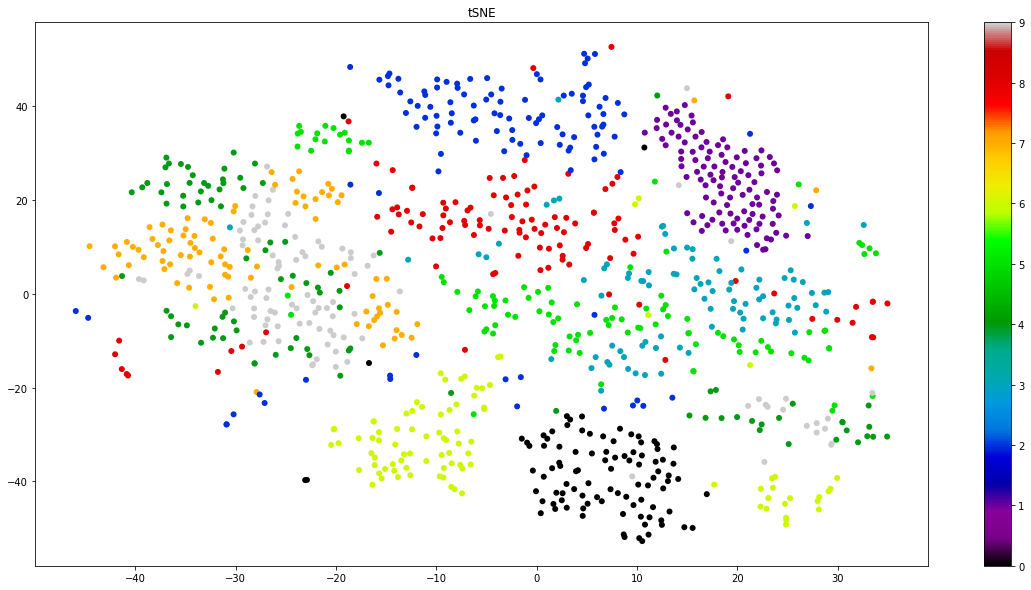

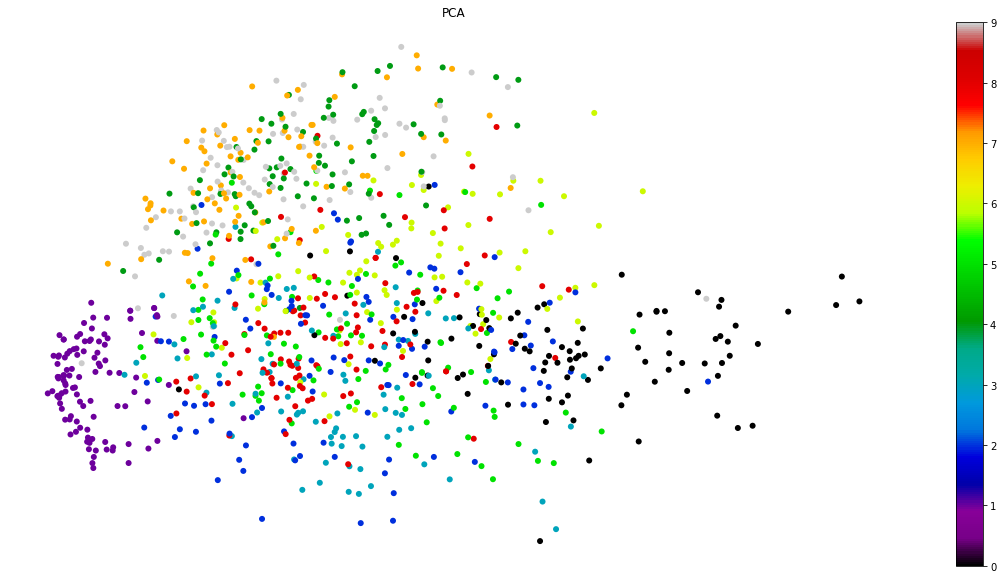

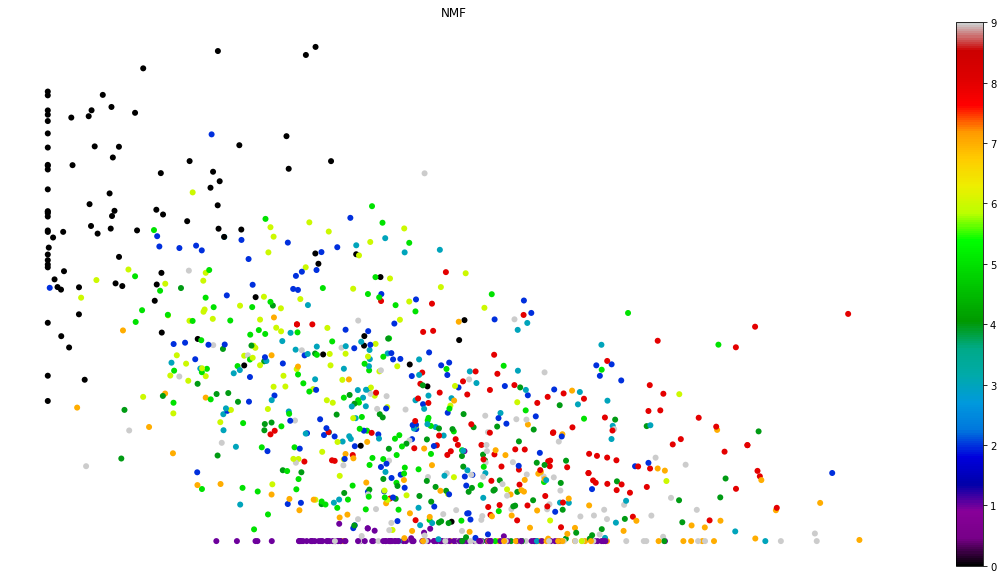

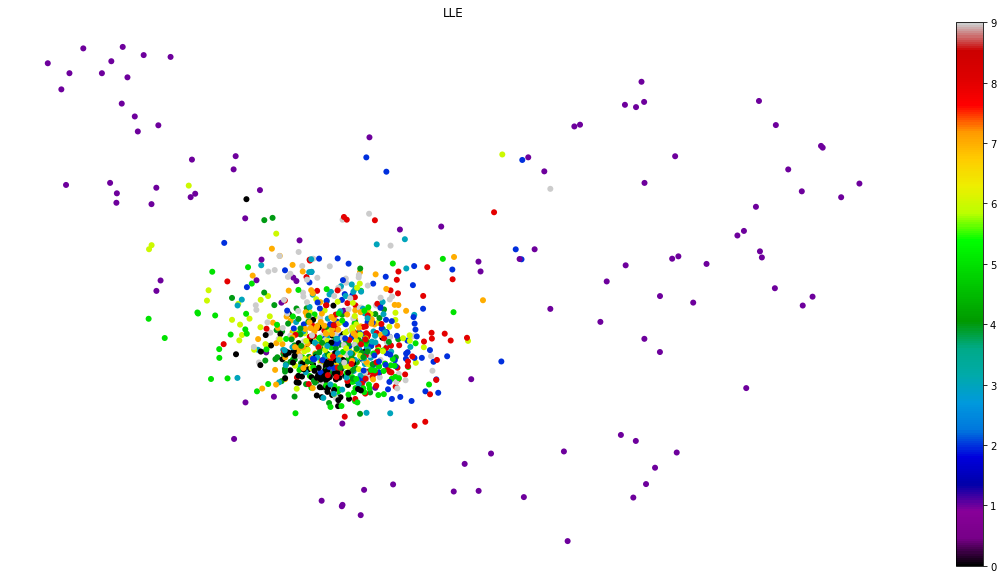

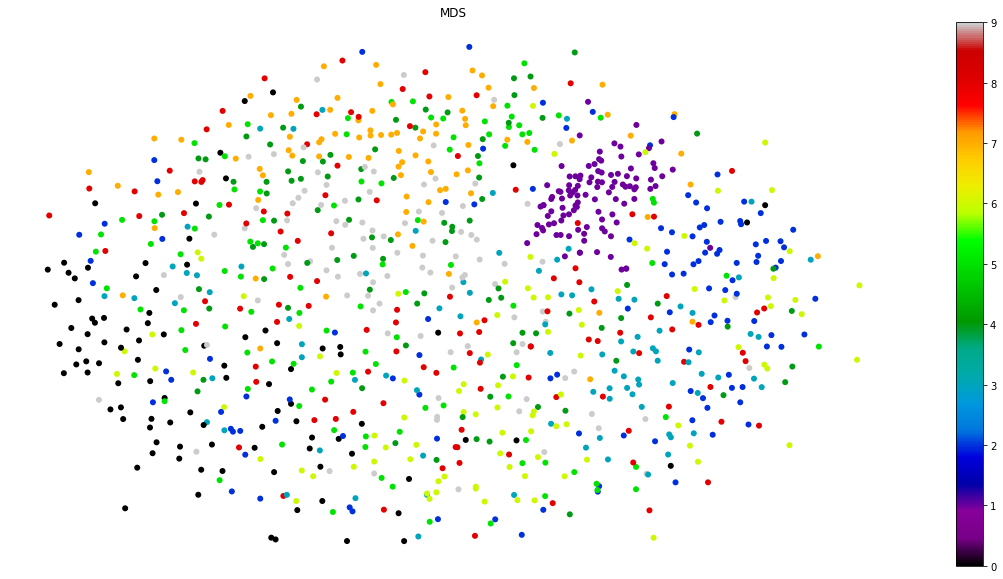

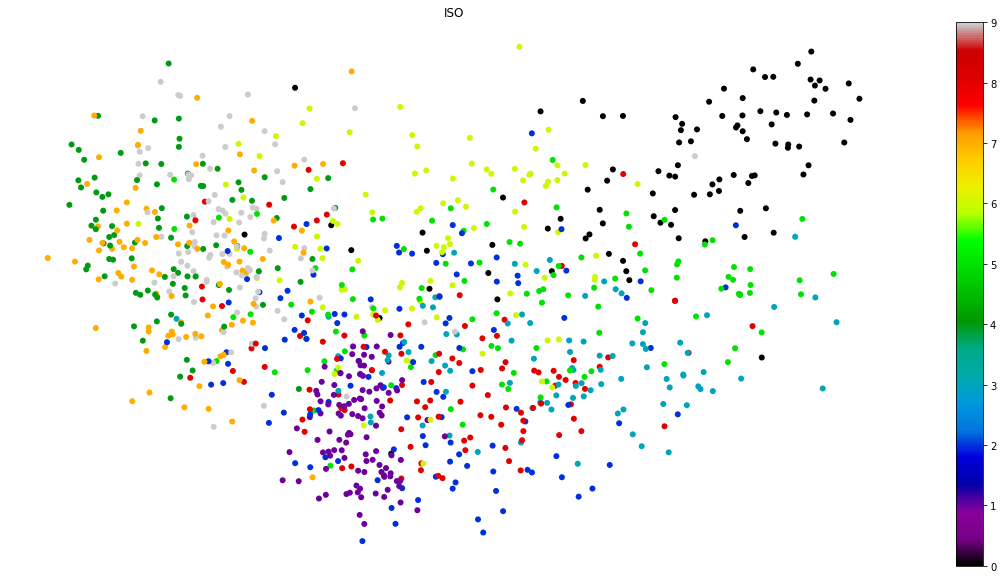

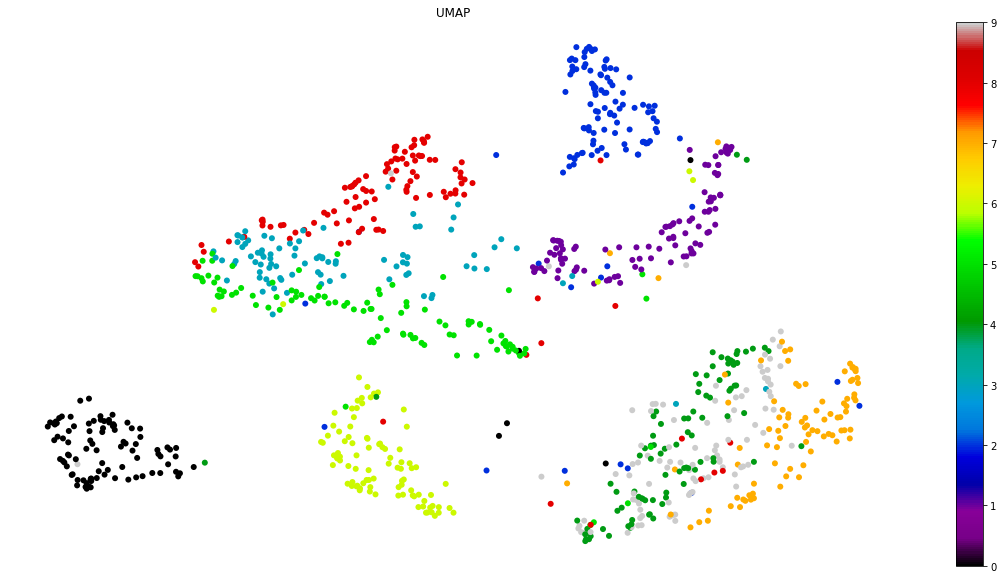

In [ ]:
# tSNE Implementation
tsne50 = TSNE(n_components=2,perplexity=60,method='exact')
Y50 = tsne50.fit_transform(digitData)
Y50_2 = tsne50.embedding_
tsne_error50 = tsne50.kl_divergence_
plt.scatter(Y50_2[:,0],Y50_2[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.title("tSNE")
plt.show()

# PCA
pca_example = PCA()
Y = pca_example.fit_transform(digitData)
plt.scatter(Y[:,0],Y[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.axis("Off");plt.title("PCA")
plt.show()

# NMF
nmf_example = NMF(n_components=2)
Y2 = nmf_example.fit_transform(digitData)
plt.scatter(Y2[:,0],Y2[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.axis("Off");plt.title("NMF")
plt.show()

# LLE
LLE_example = LocallyLinearEmbedding(n_components=2,n_neighbors=60) 
Y_lle = LLE_example.fit_transform(digitData)
Y2_lle = LLE_example.embedding_
plt.scatter(Y2_lle[:,0],Y2_lle[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.axis("Off");plt.title("LLE")
plt.show()

# MDS
mds_example = MDS(n_components=2) 
Y_mds = mds_example.fit_transform(digitData)
Y2_mds = mds_example.embedding_
plt.scatter(Y2_mds[:,0],Y2_mds[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.axis("Off");plt.title("MDS")
plt.show()

# IsoMap
iso_example = Isomap(n_components=2,n_neighbors=60) 
Y_iso = iso_example.fit_transform(digitData)
Y2_iso = iso_example.embedding_
plt.scatter(Y2_iso[:,0],Y2_iso[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.axis("Off");plt.title("ISO")
plt.show()

# uMap
umap_example = umap.UMAP(n_components=2,n_neighbors=15,min_dist=.1) 
Y_umap = umap_example.fit_transform(digitData)
Y2_umap = umap_example.embedding_
plt.scatter(Y2_umap[:,0],Y2_umap[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.axis("Off");plt.title("UMAP")
plt.show()


<font color="green"> Which method(s) would you choose to best seperate out the digits?  Why? 

TSNE or UMAP look to have the best results. Taking into account the fact that UMAP is much faster than TSNE, the better choice would likely be UMAP for scalability. For this data set and size specifically, it seems like UMAP might edge out TSNE, as it looks to have tigher clustering and the same incidence of overlap between clusters.</font>

##Clustering 

In [ ]:
# @title More Helper Functions


from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In this last section, we will apply k-means clustering and gaussian mixture models to your results from the previous section.

####k-means clustering

To apply k-means clustering, if you want to cluster data set ```Y``` into ```k``` clusters, the syntax is:

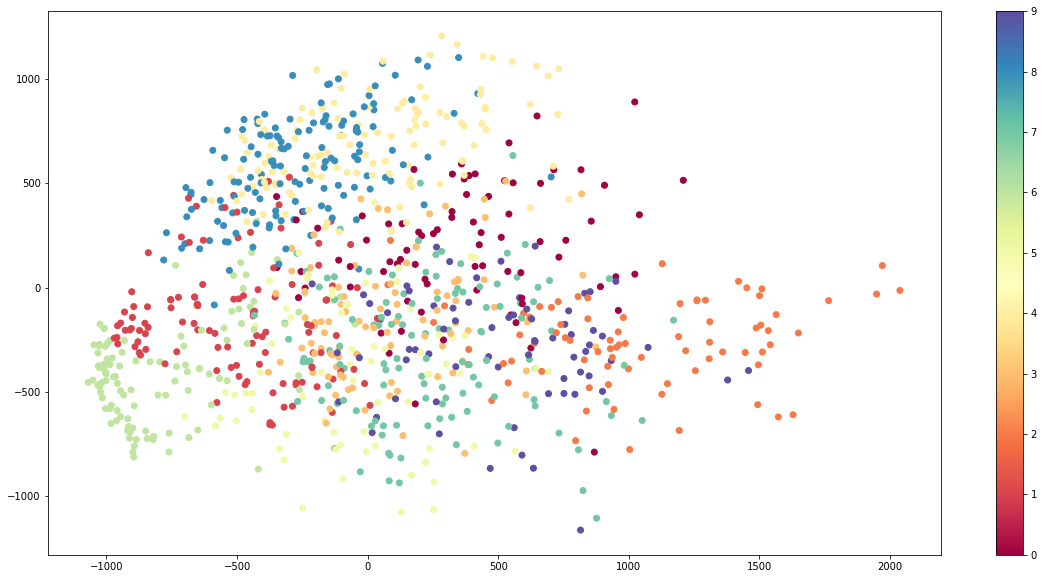

In [ ]:
k = 10
km_example = KMeans(n_clusters=k)
km_example.fit(Y)
km_labels = km_example.predict(Y)

#To plot:
plt.scatter(Y[:,0],Y[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

####Gaussian mixture models (GMM)

To apply a Gaussian Mixture Model, the syntax would be:

In [ ]:
gmm_example = GaussianMixture(n_components=k).fit(Y)
gmm_labels = gmm_example.predict(Y)
#Can plot in the same manner as above

But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the ``predict_proba`` method.
This returns a matrix of size ``[n_samples, n_clusters]`` which measures the probability that any point belongs to the given cluster:

In [ ]:
gmm_probs = gmm_example.predict_proba(Y)



```
# This is formatted as code
```

Also, to plot the "probability ellipses" around each gaussian, you can use this code:

In [ ]:
plot_gmm(gmm_example, Y)

####<font color="blue">Question #5: Apply k-means (k=10) clustering to your favorite 2-D embedding result from Question #4 and plot the results, coloring each point by its assigned cluster.  How well did this method do in identifying individual digits?  </font>

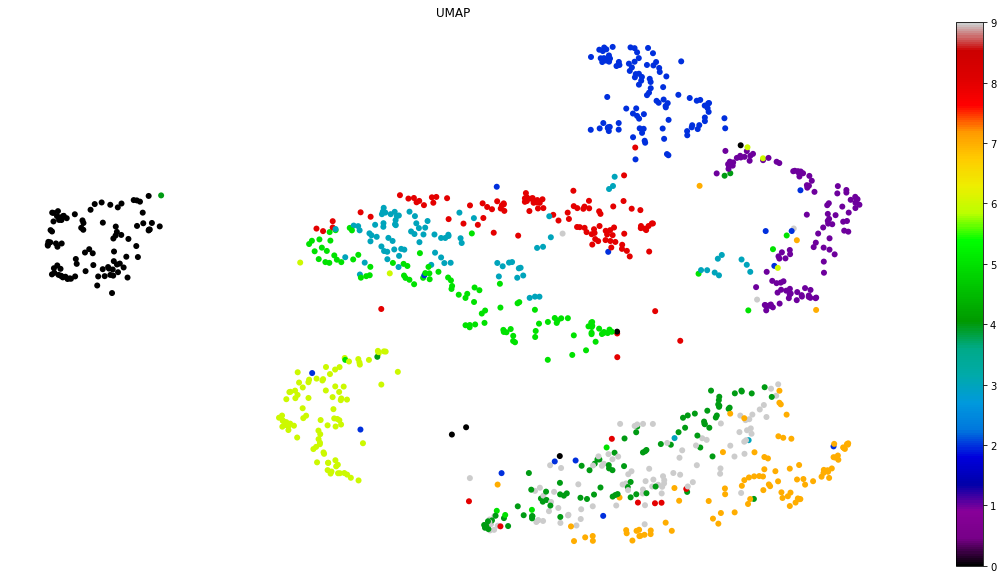

In [ ]:
# uMap
umap_example = umap.UMAP(n_components=2,n_neighbors=15,min_dist=.1) 
Y_umap = umap_example.fit_transform(digitData)
Y2_umap = umap_example.embedding_
plt.scatter(Y2_umap[:,0],Y2_umap[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar();plt.axis("Off");plt.title("UMAP")
plt.show()

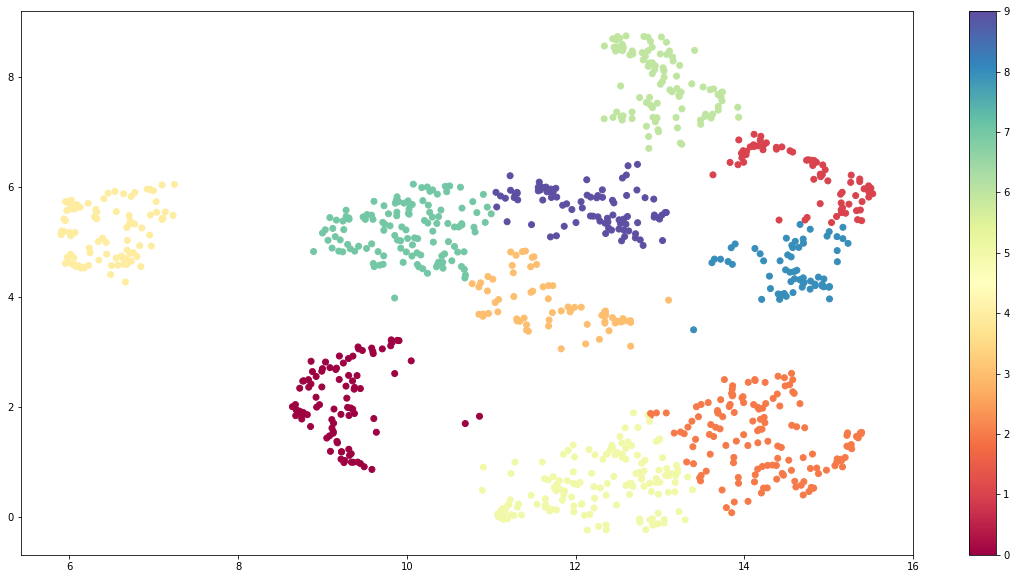

In [ ]:
k = 10
km_example = KMeans(n_clusters=k)
km_example.fit(Y2_umap)
km_labels = km_example.predict(Y2_umap)

#To plot:
plt.scatter(Y2_umap[:,0],Y2_umap[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

<font color="green">Question #5: How well did this method do in identifying individual digits? 
It did alright. The issue is that when clusters were near each other, k-means tried to guess at which data points represented the original numbers, and often did so in a mediocre way. It also ended up conflating a couple clusters that shouldn't have been conflated, and creating new clusters where none should be created.</font>

####<font color="blue">Question #6: Now apply k-means (k=10) clustering to the full data set (```digitData```) directly.  Plot the results (you can use your embedding for the x and y values on the scatterplot, but use these results for coloring the points).  How do the results compare to clustering in the low-d space? Why have they gotten better / worse / stayed the same?</font>

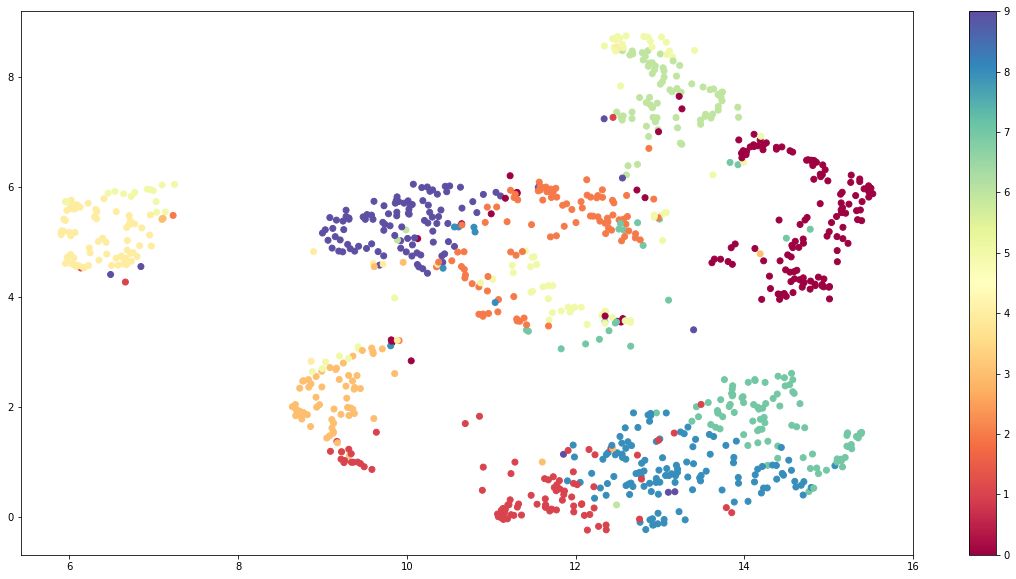

In [ ]:
k = 10
km_example = KMeans(n_clusters=k)
km_example.fit(digitData)
km_labels = km_example.predict(digitData)

#To plot:
plt.scatter(Y2_umap[:,0],Y2_umap[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

<font color="green"> How do the results compare to clustering in the low-d space? Why have they gotten better / worse / stayed the same? 

The results are much worse because now we have fed k-means a data set with no dimensionality reduction applied, and so its ability to properly classify digits is reduced. </font>

####<font color="blue">Question #7: Now apply a Gaussian Mixture Model (10 components) to the low-dimensional data and plot the results using the ```plot_gmm``` code above.  How well did this method do compared to k-means?  Why do you think it did better / worse / the same?</font>

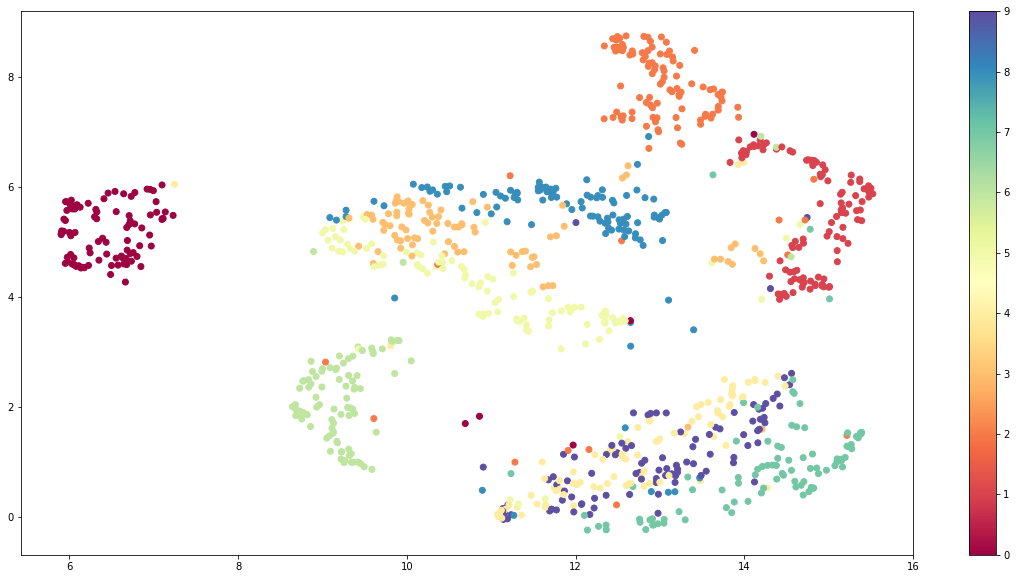

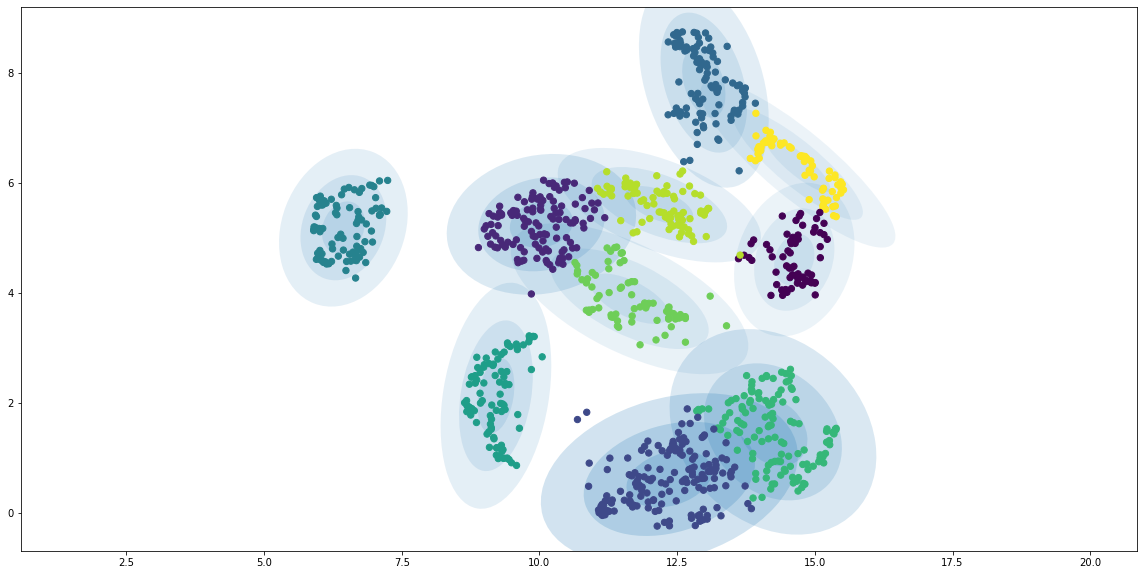

In [ ]:
k = 10
gmm_example = GaussianMixture(n_components=k).fit(Y2_umap)
gmm_labels = gmm_example.predict(Y2_umap)
plt.scatter(Y2_umap[:,0],Y2_umap[:,1],c=digitNames,cmap='Spectral');plt.colorbar();plt.show()

plot_gmm(gmm_example, Y2_umap)

<font color="green"> How well did this method do compared to k-means?  Why do you think it did better / worse / the same? 

Well, it depends on the run. Most runs seem to do about the same as k-means, but because this model is stochastic, some of the runs produced results that were closer to the true clustering. </font>


<font color="blue"> Question #8: The mutual information is a measure of all of the non-linear correlations between two variables, and it is given by:
\begin{equation}
I(X;Y) = \sum_{x\in X}\sum_{y\in Y} p(x,y)\log\frac{p(x,y)}{p(x)p(y)},
\end{equation}
where $X$ and $Y$ are random variables (here, cluster assignments).  We will talk more about this quantity soon, but for now, if the information is larger, there is more correlation between the variables.  Thus, given that we know the answer from our clustering, the higher the value of the mutual information between our clustering and the true values (```digitNames```), the better.

Calculate the mutual information between ```digitNames``` and each of your three clusterings.  Do these values change your interpretations from the previous questions? (Note: you will have to use $0 \log 0 \approx 0$ to deal with cases where $p(x,y)=0$)</font>

Kmeans High-D vs digitNames Mutual Information: 14743.409071032356
Kmeans Low-D vs digitNames Mutual Information: 19504.285418005868
GMM vs digitNames Mutual Information: 19406.221282416707


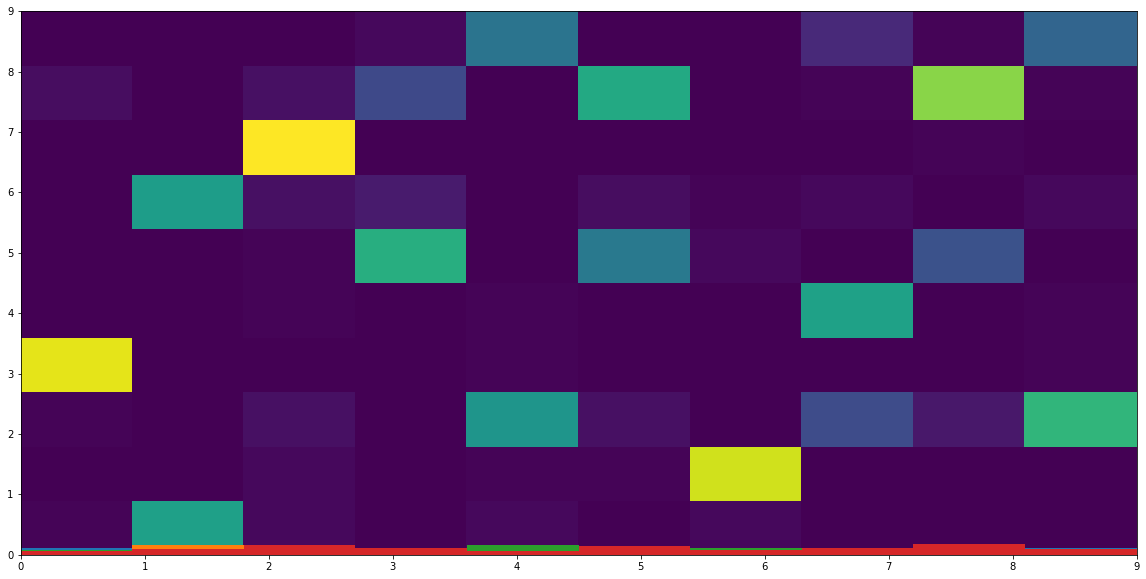

In [ ]:
# kmeans low-d
k = 10
km_example = KMeans(n_clusters=k)
km_example.fit(Y2_umap)
km_labels_low_d = km_example.predict(Y2_umap)

# kmeans high-d
km_example = KMeans(n_clusters=k)
km_example.fit(digitData)
km_labels_high_d = km_example.predict(digitData)

# gmm low-d
gmm_example = GaussianMixture(n_components=k).fit(Y2_umap)
gmm_labels = gmm_example.predict(Y2_umap)


# True prob dist for digitNames
n_bins = 10
px_hist = plt.hist(digitNames,n_bins,density=True)[0]


n_bins = 10
def mutual_information(otherLabels, labelName):
  py_hist = plt.hist(otherLabels,n_bins,density=True)[0]
  pxy_hist = plt.hist2d(digitNames,otherLabels,bins=(n_bins,n_bins),density=True)[0]
  sum = 0
  for x in range(1000):
    for y in range(1000):
      pxy = pxy_hist[digitNames[x]][otherLabels[y]]
      px = px_hist[digitNames[x]]
      py = py_hist[otherLabels[y]]
      if (pxy == 0):
        to_add = 0
      else:
        to_add = pxy * np.log(pxy / (px * py))
      sum += to_add
  print("{} vs digitNames Mutual Information: {}".format(labelName, sum))

mutual_information(km_labels_high_d, "Kmeans High-D")
mutual_information(km_labels_low_d, "Kmeans Low-D") 
mutual_information(gmm_labels, "GMM")

<font color="green">Do these values change your interpretations from the previous questions? 

No, they confirm what we initially thought upon seeing the plots, as kmeans-lowd and GMM lowd have very similar mutual information scores, and Kmeans-highd has a much lower mutual information score.</font>